In [1]:
#Throughout this document, things that can be changed by the user to investigate different 
#parts of the map are marked with #FINDME

# Import functions
import numpy as np
import matplotlib.pyplot as p
%matplotlib inline

import eigencurves
import eigenmaps
import kmeans
import bin_eigenspectra
import os
import pdb

import gen_lightcurves
import healpy as hp

import colorcet as cc
from colormap2d import generate_map2d
from matplotlib import colorbar, cm
from matplotlib.colors import BoundaryNorm, Normalize
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
p.rc('text', usetex=True)
p.rc('font', family='serif')

import run_higher_sph_harm

from importlib import import_module
planet_name = 'HD189733b'
model_name = 'hotspot' #FINDME: name of the model to perform the fit from

looking for spidermanrc file at /Users/Jake/.spidermanrc
no spidermanrc file detected


In [2]:
def show_orig_map(lam,spaxels,waveInd=0):#testNum=1):
    """
    Show the original map at a given wavelength
    
    Parameters
    -----------
    waveInd: int
        The wavelength index
    testNum: int
        The test Number (ie. lightcurve number)
    """
    #origData = np.load("data/maps/mystery_map{}.npz".format(testNum))
    lammin1 = 2.41; lammax1 = 3.98; dlam1 = 0.18
    #spaxels = origData["spaxels"]
    #lam = origData["wl"]
    lamlo, dlamlo = gen_lightcurves.construct_lam(lammin1, lammax1, dlam=dlam1)
    Nlamlo = len(lamlo)

    # Set HealPy pixel numbers
    Npix = spaxels.shape[0]

    # Define empty 2d array for spaxels
    spec2d = np.zeros((Npix, Nlamlo))

    # Loop over pixels filling with spectra
    for i in range(Npix):
        # Degrade the spectra to lower resolution
        spec2d[i,:] = gen_lightcurves.downbin_spec(spaxels[i, :], lam, lamlo, dlam = dlamlo)


    hp.mollview(spec2d[:,waveInd], title=r"%0.2f $\mu$m" %lamlo[waveInd])
    p.show()
    return spec2d

In [3]:
lammin = 2.41
lammax = 3.98

lamhr = np.linspace(lammin, lammax, 1000)

# Use `gen_lightcurves.spec_flat_with_gaussian()` to generate toy mock spectra

Text(0,0.5,'Fp/Fs')

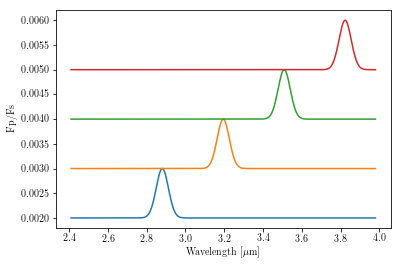

In [4]:
f1 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.002, B = 0.001, std = 0.02, xroll = -0.20)
f2 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.003, B = 0.001, std = 0.02, xroll = 0.0)  
f3 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.004, B = 0.001, std = 0.02, xroll = 0.20) 
f4 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.005, B = 0.001, std = 0.02, xroll = 0.40) 

p.plot(lamhr, f1)
p.plot(lamhr, f2)
p.plot(lamhr, f3)
p.plot(lamhr, f4)
p.xlabel("Wavelength [$\mu$m]")
p.ylabel("Fp/Fs")

Text(0,0.5,'Fp/Fs')

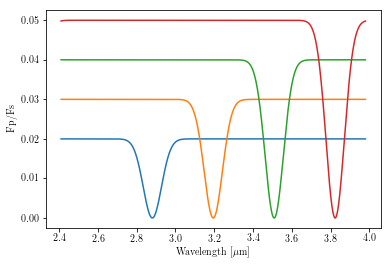

In [5]:
f1 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.02, B = -0.02, std = 0.03, xroll = -0.20)
f2 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.03, B = -0.03, std = 0.03, xroll = 0.0)  
f3 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.04, B = -0.04, std = 0.03, xroll = 0.20) 
f4 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.05, B = -0.05, std = 0.03, xroll = 0.40) 

p.plot(lamhr, f1)
p.plot(lamhr, f2)
p.plot(lamhr, f3)
p.plot(lamhr, f4)
p.xlabel("Wavelength [$\mu$m]")
p.ylabel("Fp/Fs")

Text(0,0.5,'Fp/Fs')

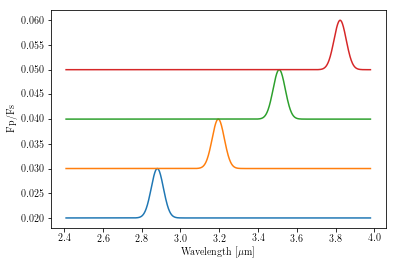

In [6]:
f1 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.02, B = 0.01, std = 0.02, xroll = -0.20)
f2 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.03, B = 0.01, std = 0.02, xroll = 0.0)  
f3 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.04, B = 0.01, std = 0.02, xroll = 0.20) 
f4 = gen_lightcurves.spec_flat_with_gaussian(lamhr, A = 0.05, B = 0.01, std = 0.02, xroll = 0.40) 

p.plot(lamhr, f1)
p.plot(lamhr, f2)
p.plot(lamhr, f3)
p.plot(lamhr, f4)
p.xlabel("Wavelength [$\mu$m]")
p.ylabel("Fp/Fs")

# Use `gen_lightcurves.create_quadrant_map()` to paint the spectra onto the planet map

/Users/Jake/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


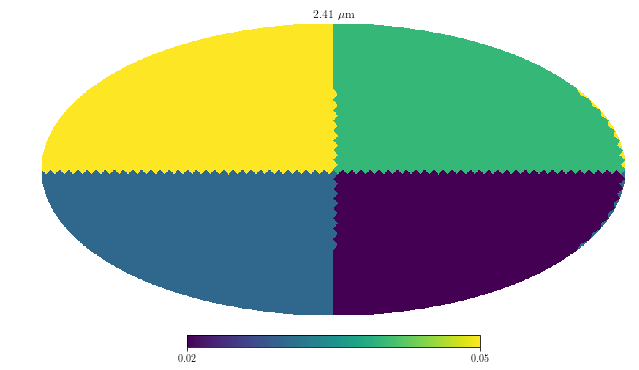

In [7]:
spaxels = gen_lightcurves.create_quadrant_map(f1, f2, f3, f4)
show_orig_map(lamhr, spaxels);

# Generate new input lightcurves

/Users/Jake/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


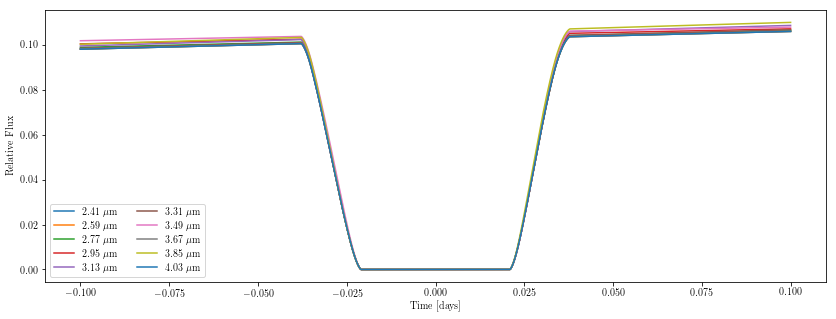

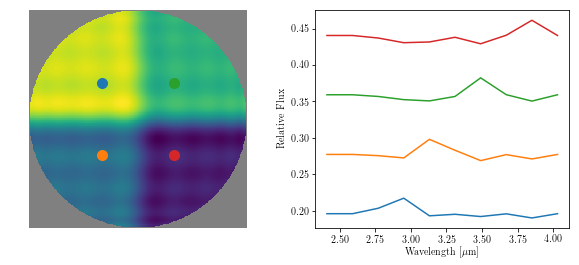

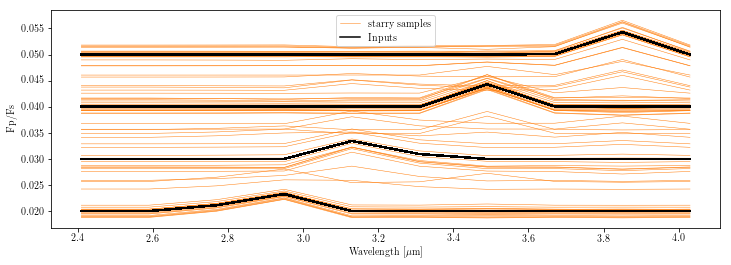

In [168]:
model_name = "quadspike"

# Generate the multi-wavelength eclipse lightcurves using starry
time, lam, dlam, lcurves = gen_lightcurves.create_lightcurves_with_starry(lamhr, spaxels, 
                                                                          plot_lightcurves = True, 
                                                                          plot_diagnostic = True, 
                                                                          plot_points_on_map_spec=True)

# Save as a .npz file in data/input_lightcurves
filename='data/input_lightcurves/'+model_name+'.npz'
np.savez(filename,time=time,wl=lam,dwl=dlam,lightcurve=lcurves)

# Perform inference

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 2
Running MCMC at 2.41 um
Running MCMC at 2.5900000000000003 um
Running MCMC at 2.7700000000000005 um
Running MCMC at 2.9500000000000006 um
Running MCMC at 3.130000000000001 um
Running MCMC at 3.310000000000001 um
Running MCMC at 3.490000000000001 um
Running MCMC at 3.6700000000000013 um
Running MCMC at 3.8500000000000014 um
Running MCMC at 4.030000000000001 um
No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 3
Running MCMC at 2.41 um


/Users/Jake/Projects/eigenspectra/eigencurves.py:189: ComplexWarning: Casting complex values to real discards the imaginary part
  spheresbest[i] += fcoeffbest.T[j,2*i-1]-fcoeffbest.T[j,2*(i-1)]
/Users/Jake/Projects/eigenspectra/eigencurves.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  spheres[i] += fcoeff.T[j,2*i-1]-fcoeff.T[j,2*(i-1)]


Running MCMC at 2.5900000000000003 um
Running MCMC at 2.7700000000000005 um
Running MCMC at 2.9500000000000006 um
Running MCMC at 3.130000000000001 um
Running MCMC at 3.310000000000001 um
Running MCMC at 3.490000000000001 um
Running MCMC at 3.6700000000000013 um
Running MCMC at 3.8500000000000014 um
Running MCMC at 4.030000000000001 um
No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 4
Running MCMC at 2.41 um
Running MCMC at 2.5900000000000003 um
Running MCMC at 2.7700000000000005 um
Running MCMC at 2.9500000000000006 um
Running MCMC at 3.130000000000001 um
Running MCMC at 3.310000000000001 um
Running MCMC at 3.490000000000001 um
Running MCMC at 3.6700000000000013 um
Running MCMC at 3.8500000000000014 um
Running MCMC at 4.030000000000001 um
No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 

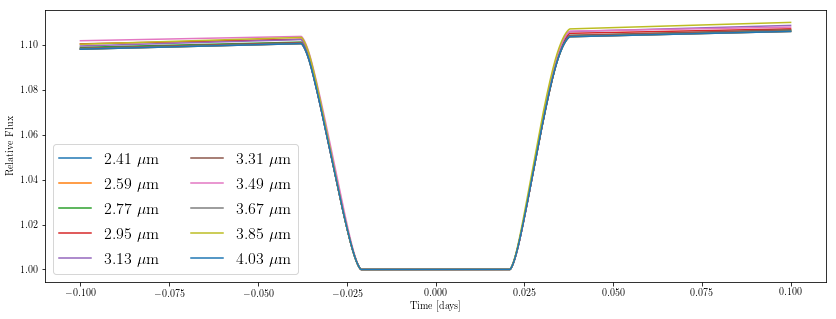

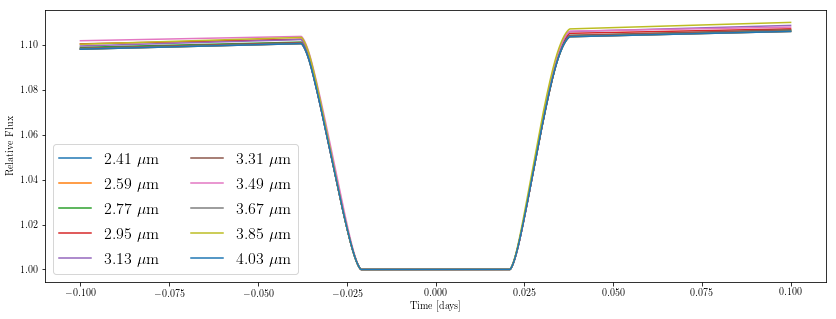

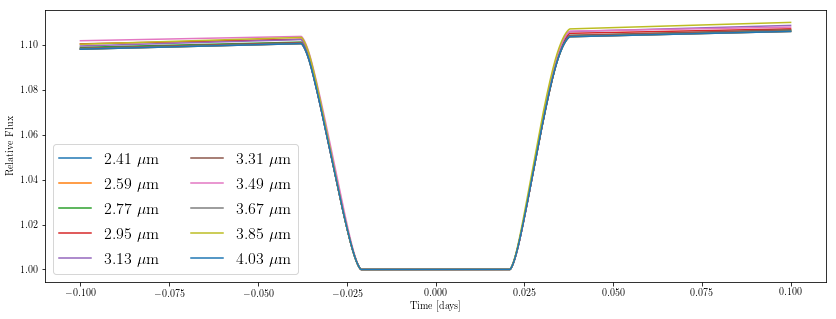

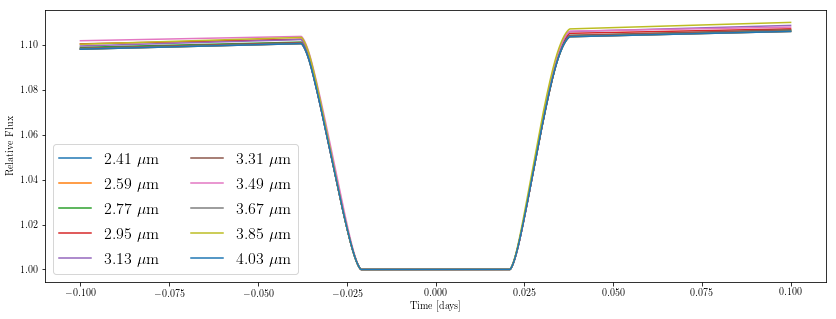

In [170]:
## Results are saved in data/sph_harmonic_coefficients_full_samples
for oneOrd in np.arange(2,6): #which degrees of spherical harmonics you want to create fits for
    run_higher_sph_harm.run_lc_noise_and_fit(norder=oneOrd,usePath=filename)

In [171]:
def retrieve_map_full_samples(degree=3,dataDir="data/sph_harmonic_coefficients_full_samples/hotspot/"):
    tmp = np.load("{}spherearray_deg_{}.npz".format(dataDir,degree))
    outDictionary = tmp['arr_0'].tolist()
    
    londim = 100
    latdim = 100
    samples = outDictionary['spherical coefficients'] # output from eigencurves
    waves = outDictionary['wavelength (um)']
    
    randomIndices = np.random.randint(0,len(samples),99)
    nRandom = len(randomIndices)
    
    fullMapArray = np.zeros([nRandom,len(waves),londim,latdim])
    for drawInd, draw in enumerate(samples[randomIndices]):
        inputArr = np.zeros([len(waves),samples.shape[1]+1])
        inputArr[:,0] = waves
        inputArr[:,1:] = draw.transpose()
        
        wavelengths, lats, lons, maps = eigenmaps.generate_maps(inputArr,
                                                                N_lon=londim, N_lat=latdim)
        fullMapArray[drawInd,:,:,:] = maps
    
    return fullMapArray, lats, lons, waves
    

    
def plot_retrieved_map(fullMapArray,lats,lons,waves,waveInd=3,degree=3):
    percentiles = [5,50,95]
    mapLowMedHigh = np.percentile(fullMapArray,percentiles,axis=0)
    londim = fullMapArray.shape[2]
    
    fig, axArr = p.subplots(1,3,figsize=(22,5))
    for ind,onePercentile in enumerate(percentiles):
        map_day = mapLowMedHigh[ind][waveInd][:,londim//4:-londim//4]
        extent = np.array([np.min(lons),np.max(lons),np.min(lats),np.max(lats)])/2./np.pi*180
        plotData = axArr[ind].imshow(map_day, extent=extent)
        cbar = fig.colorbar(plotData,ax=axArr[ind])
        cbar.set_label('Brightness')
        axArr[ind].set_ylabel('Latitude')
        axArr[ind].set_xlabel('Longitude')
        axArr[ind].set_title("{} %".format(onePercentile))
        #axArr[ind].show()
    
    fig.suptitle('Retrieved group map, n={}, {:.2f}$\mu$m'.format(degree,waves[waveInd]))

def get_map_and_plot(waveInd=3,degree=3,dataDir="data/sph_harmonic_coefficients_full_samples/hotspot/"):
    '''
    Plots spherical harmonic maps at one wavelength for 5th, 50th, and 95th percentile posterior samples
    
    Inputs
    ----------
    waveInd: int
        Index of the wavelength for which a map will be created
    degree: int
        Spherical harmonic degree to draw samples from
    dataDir: str
        Path to the directory containing the spherical harmonic coefficients
        
    Outputs
    -----------
    waves: array
        Wavelengths for the eigenspectra
    '''
    fullMapArray, lats, lons, waves = retrieve_map_full_samples(degree=degree,dataDir=dataDir)
    plot_retrieved_map(fullMapArray,lats,lons,waves,degree=degree,waveInd=waveInd)
    return waves, lats, lons

def all_sph_degrees(waveInd=5):
    for oneDegree in np.arange(2,6):
        get_map_and_plot(waveInd=waveInd,degree=oneDegree)

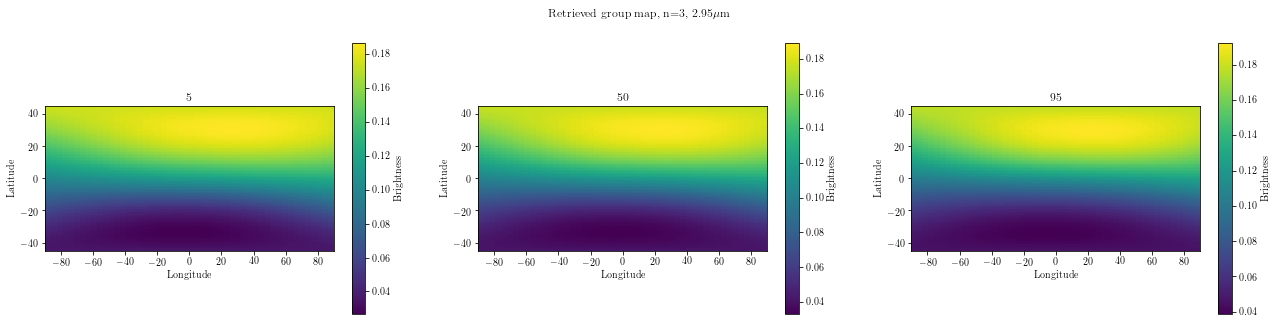

In [172]:
dataDir='data/sph_harmonic_coefficients_full_samples/'+model_name+'/'
waves, lats, lons = get_map_and_plot(waveInd=3,degree=3,dataDir=dataDir) #FINDME: using a different waveInd will show maps at a different wavelength; using a different degree will show a fit with a different number of spherical harmonics


In [173]:
def find_groups(dataDir,ngroups=4,degree=2,
                londim=100, latdim=100,
                trySamples=45,sortMethod='avg'):
    """ 
    Find the eigenspectra using k means clustering
    
    Parameters
    ----------
    ngroups: int
        Number of eigenspectra to group results into
    degree: int
        Spherical harmonic degree to draw samples from
    testNum: int
        Test number (ie. lightcurve number 1,2, etc.)
    trySamples: int
        Number of samples to find groups with
        All samples take a long time so this takes a random
        subset of samples from which to draw posteriors
    sortMethod: str
        Method to sort the groups returned by K means clustering
        None, will not sort the output
        'avg' will sort be the average of the spectrum
        'middle' will sort by the flux in the middl of the spectrum
    """
    #samplesDir = "data/sph_harmonic_coefficients_full_samples"
    #dataDir = "{}/eclipse_lightcurve_test{}/".format(samplesDir,testNum)
    tmp = np.load("{}spherearray_deg_{}.npz".format(dataDir,degree))
    outDictionary = tmp['arr_0'].tolist()
    samples = outDictionary['spherical coefficients'] # output from eigencurves

    eigenspectra_draws = []
    kgroup_draws = []

    randomIndices = np.random.randint(0,len(samples),trySamples)
    for draw in samples[randomIndices]:
        ## Re-formatting here into a legacy system
        ## 1st dimension is wavelength
        ## 2nd dimensions is data (0th element = wavelength)
        ##                        (1: elements are spherical harmonic coefficients)
        inputArr = np.zeros([10,samples.shape[1]+1])
        inputArr[:,0] = np.array([2.41,2.59,2.77,2.95,3.13,3.31,3.49,3.67,3.85,4.03])
        inputArr[:,1:] = draw.transpose()

        wavelengths, lats, lons, maps = eigenmaps.generate_maps(inputArr, N_lon=londim, N_lat=latdim)

        kgroups = kmeans.kmeans(maps, ngroups)

        eigenspectra = bin_eigenspectra.bin_eigenspectra(maps, kgroups)

        eigenspectra_draws.append(eigenspectra)
        kgroup_draws.append(kgroups)
    if sortMethod is not None:
        eigenspectra_draws_final, kgroup_draws_final = kmeans.sort_draws(eigenspectra_draws,
                                                                         kgroup_draws,
                                                                         method=sortMethod)
    else:
        eigenspectra_draws_final, kgroup_draws_final = eigenspectra_draws, kgroup_draws
    return eigenspectra_draws_final, kgroup_draws_final, maps

In [186]:
degree=3 #FINDME: change this to investigate fits with different numbers of spherical harmonics
ngroups=3 #FINDME: change ngroups to cluster the data into a different number of eigengroups
eigenspectra_draws, kgroup_draws, maps = find_groups(dataDir,degree=degree,trySamples=200,ngroups=ngroups) 


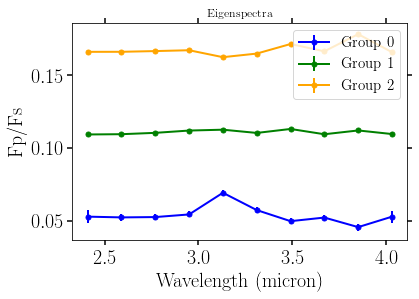

In [187]:
# THIS IS THE PART THAT NEEDS TO BE UPDATED FOR THE ERRORS THING
eigenspectra = np.mean(eigenspectra_draws, axis=0)
eigenerrs = np.std(eigenspectra_draws, axis=0)
kgroups = np.mean(kgroup_draws, axis=0)

counter=0
colors=['b','g','orange']
for spec, err in zip(eigenspectra, eigenerrs):
    p.errorbar(waves, spec, err,label=('Group '+np.str(counter)),linewidth=2,marker='.',markersize=10,color=colors[counter])
    counter+=1
p.xlabel('Wavelength (micron)',fontsize=20)
p.ylabel('Fp/Fs',fontsize=20)
p.tick_params(labelsize=20,axis="both",right=True,top=True,width=1.5,length=5)
p.title('Eigenspectra')
p.legend(fontsize=15)
p.show()
#p.savefig('plots/eigenmap_and_spec/'+'hot_spot_spectra_deg3_3groups_error_bars.pdf',bbox_inches='tight')

In [180]:
full_extent = np.array([np.min(lons),np.max(lons),np.min(lats),np.max(lats)])/np.pi*180
# londim, latdim = np.shape(maps)[1:]

maps_mean = np.average(maps, axis=0)
maps_error = np.std(maps, axis=0)

cmap = cc.cm['isolum']
cmap_grey = cc.cm['linear_grey_10_95_c0']
# norm = Normalize(vmin=np.min(maps_mean), vmax=np.max(maps_mean))

/Users/Jake/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Jake/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


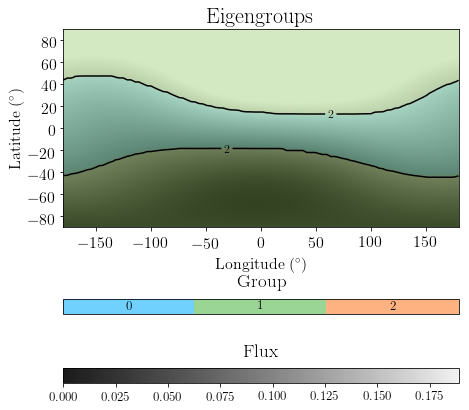

In [181]:
p.figure(figsize=(10,6.5))
p.title('Eigengroups', fontsize=22)


group_map = generate_map2d(hue_quantity=0.5*kgroups,
                           lightness_quantity=maps_mean,
                           hue_cmap=cmap,
                           scale_min=10,
                           scale_max=90)
p.imshow(group_map, extent=full_extent, interpolation='gaussian')
CS = p.contour(lons/np.pi*180, -lats/np.pi*180, 2*kgroups,
               levels=np.arange(ngroups), colors='k', linestyles=['solid', 'dashed', 'dotted'])

p.clabel(CS, inline=1, fmt='%1.0f', fontsize=12)

p.xlabel(r'Longitude ($^\circ$)', fontsize=16)
p.ylabel(r'Latitude ($^\circ$)', fontsize=16)
p.setp(p.axes().get_xticklabels(), fontsize=16)
p.setp(p.axes().get_yticklabels(), fontsize=16)

cmap_group = cmap
cNorm_group  = Normalize(vmin=0, vmax=ngroups-1)
scalarMap_group = cm.ScalarMappable(norm=cNorm_group, cmap=cmap_group)

cmap_flux = cmap_grey
cNorm_flux  = Normalize(vmin=0, vmax=np.nanmax(maps_mean))
scalarMap_flux = cm.ScalarMappable(norm=cNorm_flux, cmap=cmap_flux)

bounds = np.linspace(-0.5, ngroups-0.5, ngroups+1)
norm_group = BoundaryNorm(bounds, cmap_group.N)

divider = make_axes_locatable(p.axes())
ax2 = divider.append_axes("bottom", size="7.5%", pad=1)
cb = colorbar.ColorbarBase(ax2, cmap=cmap_group, norm=norm_group, spacing="proportional", orientation='horizontal', ticks=np.arange(0, ngroups, 1), boundaries=bounds)
cb.ax.xaxis.set_minor_formatter(FormatStrFormatter('%.1g'))
cb.ax.tick_params(axis='x', labelsize=13)
cb.ax.tick_params(axis='x', direction='inout',  top='off', bottom='off',
                  labeltop='on', labelbottom='off', labelsize=13, pad=-15)
cb.ax.set_title('Group', y=1.35, fontsize=19)

ax3 = divider.append_axes("bottom", size="7.5%", pad=0.75)
cb = colorbar.ColorbarBase(ax3, cmap=cmap_flux, norm=cNorm_flux, orientation='horizontal')
cb.ax.tick_params(axis='x', labelsize=13)
cb.ax.set_title('Flux', y=1.35, fontsize=19)

for filetype in ['png', 'pdf']:
    p.savefig('HUEgroup_LUMflux_fullmap.{}'.format(filetype), dpi=300, bbox_inches='tight')

/Users/Jake/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


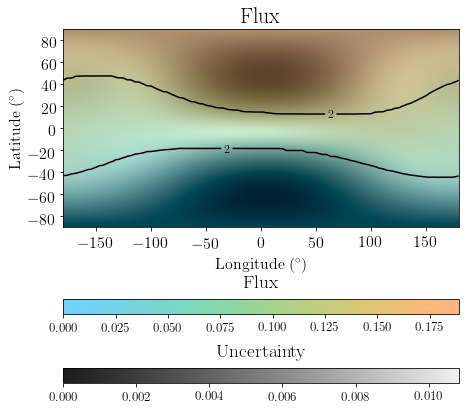

In [182]:
p.figure(figsize=(10,6.5))
p.title('Flux', fontsize=22)

group_map = generate_map2d(hue_quantity=(maps_mean-np.min(maps_mean))/np.ptp(maps_mean),
                           lightness_quantity=1-((maps_error-np.min(maps_error))/np.ptp(maps_error)),
                           hue_cmap=cmap,
                           scale_min=10,
                           scale_max=90)
p.imshow(group_map, extent=full_extent, interpolation='gaussian')
CS = p.contour(lons/np.pi*180, -lats/np.pi*180, 2*kgroups,
               levels=np.arange(ngroups), colors='k', linestyles=['solid', 'dashed', 'dotted'])

p.clabel(CS, inline=1, fmt='%1.0f', fontsize=12)

p.xlabel(r'Longitude ($^\circ$)', fontsize=16)
p.ylabel(r'Latitude ($^\circ$)', fontsize=16)
p.setp(p.axes().get_xticklabels(), fontsize=16)
p.setp(p.axes().get_yticklabels(), fontsize=16)

cmap_flux = cmap
cNorm_flux = Normalize(vmin=0, vmax=np.nanmax(maps_mean))
scalarMap_flux = cm.ScalarMappable(norm=cNorm_flux, cmap=cmap_flux)

cmap_stdev = cmap_grey
cNorm_stdev  = Normalize(vmin=0, vmax=np.nanmax(maps_error))
scalarMap_stdev = cm.ScalarMappable(norm=cNorm_stdev, cmap=cmap_stdev)

divider = make_axes_locatable(p.axes())
ax2 = divider.append_axes("bottom", size="7.5%", pad=1)
cb = colorbar.ColorbarBase(ax2, cmap=cmap_flux, norm=cNorm_flux, orientation='horizontal')
cb.ax.tick_params(axis='x', labelsize=13)
cb.ax.set_title('Flux', y=1.35, fontsize=19)

ax3 = divider.append_axes("bottom", size="7.5%", pad=0.75)
cb = colorbar.ColorbarBase(ax3, cmap=cmap_stdev, norm=cNorm_stdev, orientation='horizontal')
cb.ax.tick_params(axis='x', labelsize=13)
cb.ax.set_title('Uncertainty', y=1.35, fontsize=19)

for filetype in ['png', 'pdf']:
    p.savefig('HUEflux_LUMstdev_fullmap.{}'.format(filetype), dpi=300, bbox_inches='tight')